In [1]:
import torch

import intel_extension_for_pytorch as ipex

/home/u548badcab447ee54f995430bba52d6f/.local/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/u548badcab447ee54f995430bba52d6f/.local/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/u548badcab447ee54f995430bba52d6f/.local/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
!python -m pip install intel_extension_for_pytorch

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


No XPU devices available or preferred device not found. Using CPU.
cpu


In [ ]:
import torch
from diffusers import DiffusionPipeline

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Previous Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2", revision=None, variant=None, torch_dtype=torch.float32
)
pipeline = pipeline.to(device) # Use the device object here

# Load attention processors
pipeline.unet.load_attn_procs("NouRed/sd-fashion-products")

# Run Inference
generator = torch.Generator(device=device) # Use the device object here
seed = 42
if seed is not None:
    generator = generator.manual_seed(seed)

prompt = "outer, The North Face x Supreme White Label Nuptse Down Jacket Cream, a photography of a white puffer jacket with a red box logo on the front."
image = pipeline(prompt, num_inference_steps=30, generator=generator).images[0]  

# Save Generated Product
image.save("red_box_jacket.png")

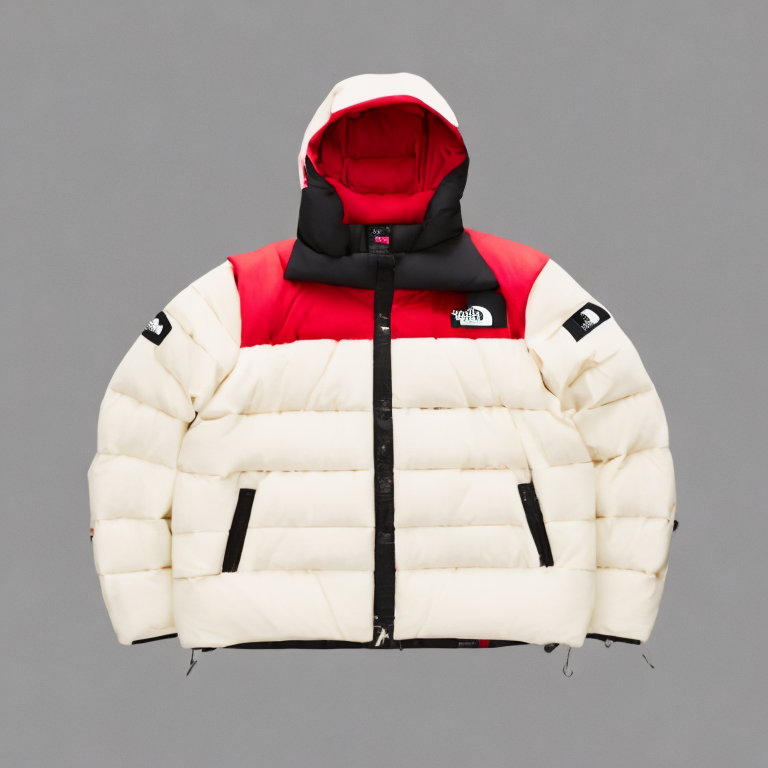

In [7]:
from PIL import Image

image=Image.open('red_box_jacket.png')

image.show()